In [55]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [56]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [57]:
print(X.shape,y.shape)

(100, 5) (100,)


In [58]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-3.086952,-1.200453,-0.377903,1.154063,-2.698696,0
1,0.381995,-1.827256,-2.540379,2.898622,-1.515682,0
2,4.469082,-1.559696,5.256196,2.449708,0.022095,1
3,-4.069583,-0.543471,-0.922710,-0.655686,-1.709928,0
4,-0.594708,-1.503015,-1.040850,2.685622,-2.636565,0


In [59]:
#row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [60]:
#feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [61]:

#combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [62]:
df1 = combined_sampling(df,0.5,0.5)
df2 = combined_sampling(df,0.5,0.5)
df3 = combined_sampling(df,0.5,0.5)
#warning coming for changing dataframe

<ipython-input-60-0fa1432f2ffd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
<ipython-input-60-0fa1432f2ffd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
<ipython-input-60-0fa1432f2ffd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [63]:
print(df1.sample(3))
print(df2.sample(3))
print(df3.sample(3))

        col1      col5  target
83 -0.952628  0.161504       0
28  0.386064  0.057882       1
63  0.859472  0.640806       1
        col1      col4  target
45  0.899444  2.854131       1
20 -0.783479  0.806583       0
51  0.826497 -0.089490       1
        col1      col2  target
41  1.641931 -0.365763       1
49 -3.089753 -1.131207       0
91 -0.452684 -0.580366       0


In [64]:
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier()
dtc2 = DecisionTreeClassifier()
dtc3 = DecisionTreeClassifier()

In [65]:
dtc1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
dtc2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
dtc3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [66]:
from sklearn.tree import plot_tree


[Text(0.375, 0.9166666666666666, 'x[1] <= -0.375\ngini = 0.493\nsamples = 50\nvalue = [28, 22]'),
 Text(0.16666666666666666, 0.75, 'x[0] <= 1.588\ngini = 0.083\nsamples = 23\nvalue = [22, 1]'),
 Text(0.08333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.25, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5833333333333334, 0.75, 'x[1] <= 0.898\ngini = 0.346\nsamples = 27\nvalue = [6, 21]'),
 Text(0.4166666666666667, 0.5833333333333334, 'x[1] <= 0.849\ngini = 0.473\nsamples = 13\nvalue = [5, 8]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[0] <= -0.114\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.25, 0.25, 'x[0] <= -1.462\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4166666666666667, 0.25, 'gini = 0.0\nsamples = 7\nvalue

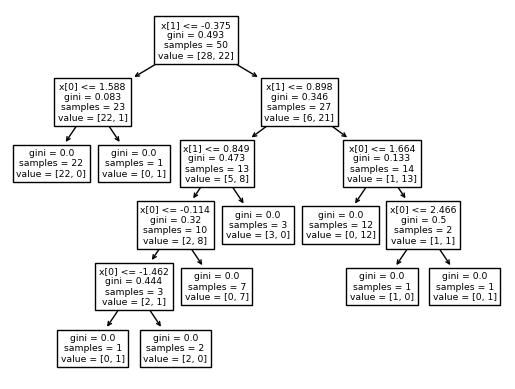

In [67]:
plot_tree(dtc1)

[Text(0.546875, 0.9166666666666666, 'x[0] <= 0.08\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.28125, 0.75, 'x[1] <= -0.389\ngini = 0.269\nsamples = 25\nvalue = [21, 4]'),
 Text(0.125, 0.5833333333333334, 'x[1] <= -0.845\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.0625, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4375, 0.5833333333333334, 'x[1] <= 2.569\ngini = 0.165\nsamples = 22\nvalue = [20, 2]'),
 Text(0.3125, 0.4166666666666667, 'x[0] <= -0.333\ngini = 0.095\nsamples = 20\nvalue = [19, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.375, 0.25, 'x[1] <= 0.967\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3125, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4375, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5625, 0.4166666666666667, 'x[1] <= 2.708\ngini = 0.5\nsamples 

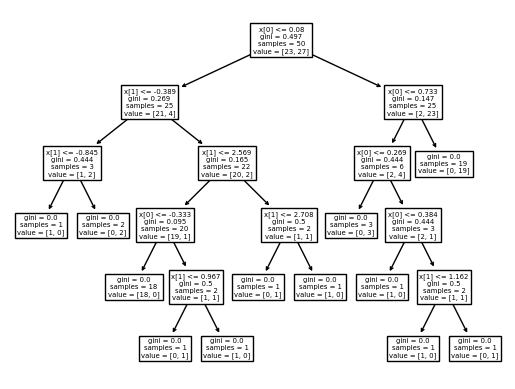

In [68]:

plot_tree(dtc2)

[Text(0.4230769230769231, 0.9, 'x[0] <= 0.025\ngini = 0.461\nsamples = 50\nvalue = [18, 32]'),
 Text(0.15384615384615385, 0.7, 'x[1] <= -2.419\ngini = 0.278\nsamples = 18\nvalue = [15, 3]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23076923076923078, 0.5, 'x[1] <= -0.507\ngini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(0.15384615384615385, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.3076923076923077, 0.3, 'x[0] <= -0.466\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6923076923076923, 0.7, 'x[0] <= 2.528\ngini = 0.17\nsamples = 32\nvalue = [3, 29]'),
 Text(0.5384615384615384, 0.5, 'x[0] <= 1.664\ngini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(0.46153846153846156, 0.3, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(0.6153846153846154, 0.3, 'x[0] <= 1.767\ngini

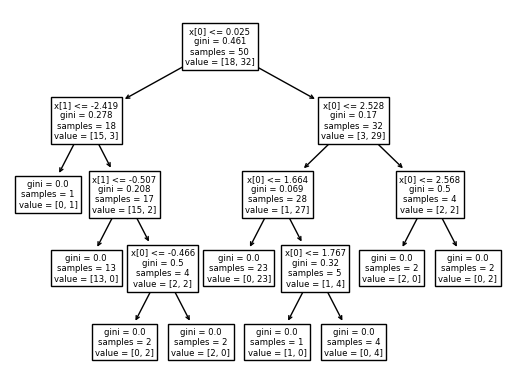

In [69]:
plot_tree(dtc3)

In [70]:
print(dtc1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2)))
print(dtc2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2)))
print(dtc3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2)))

[0]
[0]
[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
